In [3]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv(r"D:\Smz-Work\Python-DA\Stata\Total-automotive-cost-of-revenues.csv", parse_dates=['time'], index_col='time')
data

,Year,Cost
time,,
2012-01-01,2012,19
2012-04-01,2012,21
2012-07-01,2012,58
2012-10-01,2012,282
2013-01-01,2013,465
2013-04-01,2013,304
2013-07-01,2013,328
2013-10-01,2013,458
2014-01-01,2014,465


In [4]:
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [5]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

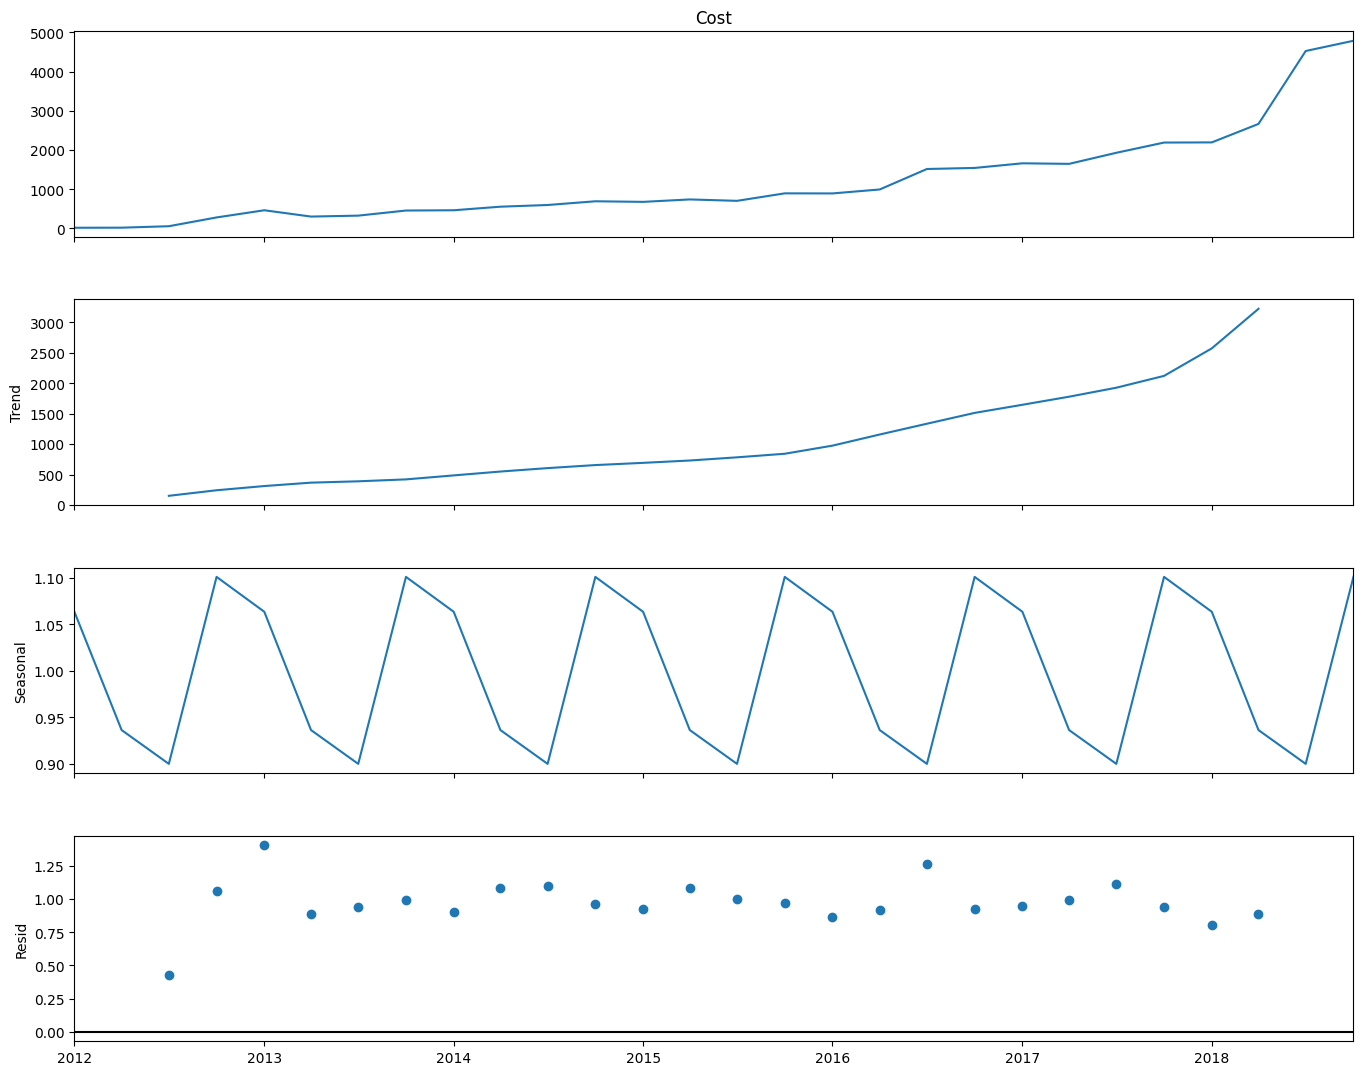

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.Cost, model='multiplicative')
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,12)

In [7]:
data['log_cost'] = np.log(data['Cost'])


In [8]:
data

,Year,Cost,log_cost
time,,,
2012-01-01,2012,19,2.944439
2012-04-01,2012,21,3.044522
2012-07-01,2012,58,4.060443
2012-10-01,2012,282,5.641907
2013-01-01,2013,465,6.142037
2013-04-01,2013,304,5.717028
2013-07-01,2013,328,5.793014
2013-10-01,2013,458,6.126869
2014-01-01,2014,465,6.142037


In [9]:
from statsmodels.tsa.stattools import adfuller as adf

In [10]:
adf(data['log_cost'])

(-2.863760827841952,
 0.04972732836213341,
 0,
 27,
 {'1%': -3.6996079738860943,
  '5%': -2.9764303469999494,
  '10%': -2.627601001371742},
 -14.214349692942271)

In [12]:
adf(data['Cost'])

(3.089691217055644,
 1.0,
 7,
 20,
 {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125},
 257.8619089747046)

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [21]:

smodel = pm.auto_arima(data['log_cost'], start_p=1, start_q=1,
                         test='adf',
                         max_p=10, max_q=10, m=4,
                         start_P=0, seasonal=True,
                         stationary=True,
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[4] intercept   : AIC=29.653, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=99.530, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=40.859, Time=0.10 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=187.515, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AIC=29.320, Time=0.08 sec
 ARIMA(1,0,1)(1,0,0)[4] intercept   : AIC=29.414, Time=0.12 sec
 ARIMA(1,0,1)(1,0,1)[4] intercept   : AIC=33.321, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=40.423, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[4] intercept   : AIC=30.617, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[4] intercept   : AIC=30.162, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[4] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[4] intercept   : AIC=33.237, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[4] intercept   : AIC=31.837, Time=0.16 sec
 ARIM

In [78]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -10.660
Date:                Fri, 20 Oct 2023   AIC                             29.320
Time:                        15:05:48   BIC                             34.649
Sample:                    01-01-2012   HQIC                            30.949
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2012      0.367      0.548      0.584      -0.518       0.921
ar.L1          0.9661      0.069     13.985      0.000       0.831       1.101
ma.L1          0.7129      0.196      3.645      0.000       0.330       1.096
sigma2         0.1069      0.033      3.201      0.001       0.041       0.172
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 3.35
Prob(Q):                              0.73   Prob(JB):                         0.19
Heteroskedasticity (H):               0.21   Skew:                             0.77
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

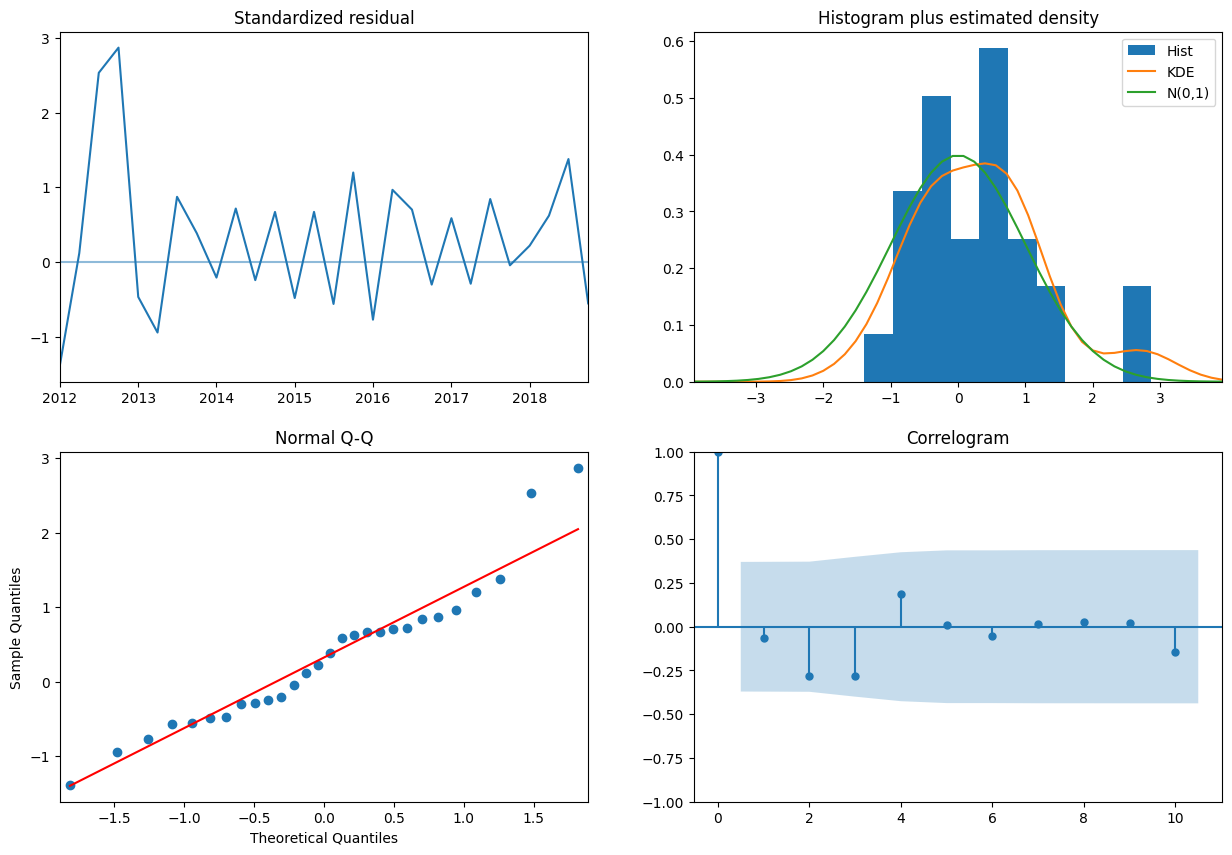

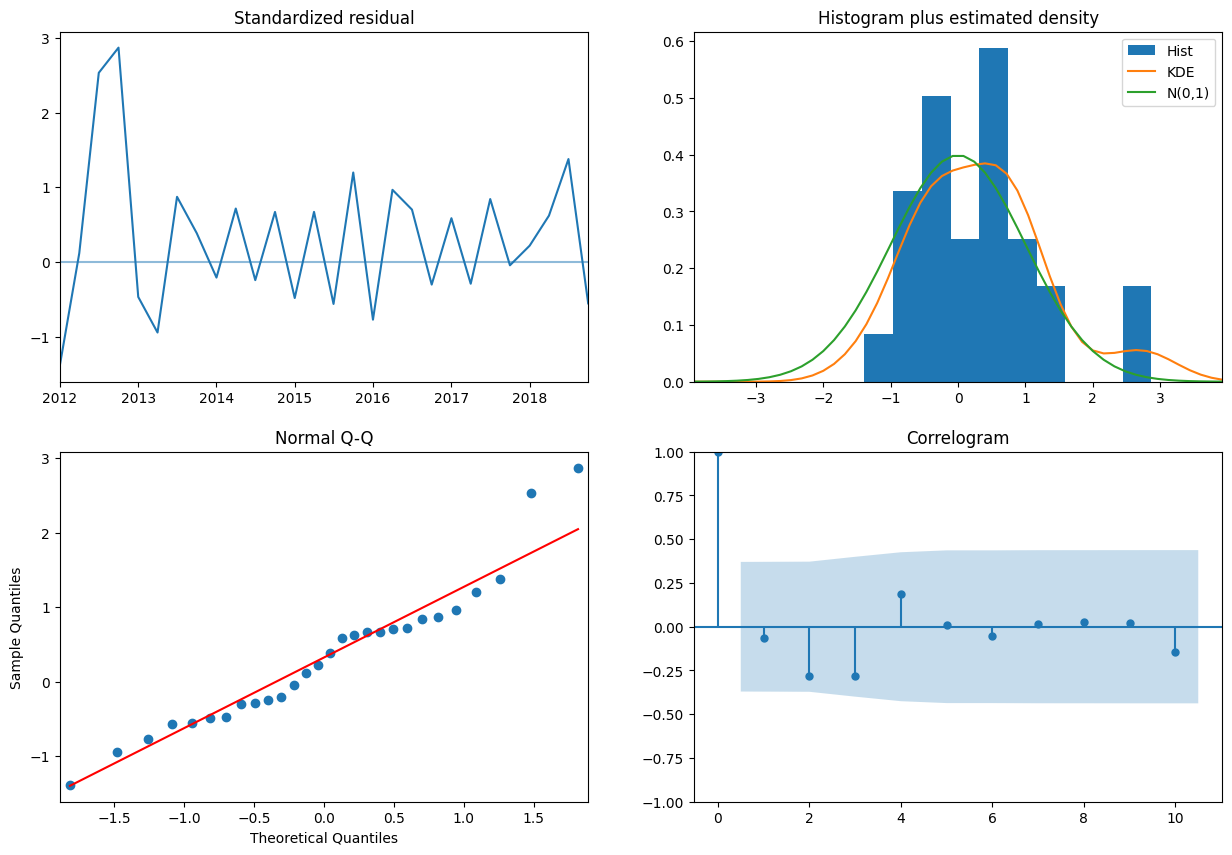

In [23]:
smodel.plot_diagnostics(figsize=(15, 10))

In [61]:
pred_ln, confint_ln = smodel.predict(n_periods=16, return_conf_int=True)

In [62]:
pred_ln

2019-01-01    8.258233
2019-04-01    8.179194
2019-07-01    8.102838
2019-10-01    8.029074
2020-01-01    7.957813
2020-04-01    7.888971
2020-07-01    7.822465
2020-10-01    7.758216
2021-01-01    7.696149
2021-04-01    7.636187
2021-07-01    7.578261
2021-10-01    7.522301
2022-01-01    7.468240
2022-04-01    7.416014
2022-07-01    7.365561
2022-10-01    7.316819
Freq: QS-OCT, dtype: float64

In [63]:
pred = pd.DataFrame(pred_ln)
pred

,0
2019-01-01,8.258233
2019-04-01,8.179194
2019-07-01,8.102838
2019-10-01,8.029074
2020-01-01,7.957813
2020-04-01,7.888971
2020-07-01,7.822465
2020-10-01,7.758216
2021-01-01,7.696149
2021-04-01,7.636187


In [64]:
pred.columns=['lg_pred_val']


In [65]:
pred

,lg_pred_val
2019-01-01,8.258233
2019-04-01,8.179194
2019-07-01,8.102838
2019-10-01,8.029074
2020-01-01,7.957813
2020-04-01,7.888971
2020-07-01,7.822465
2020-10-01,7.758216
2021-01-01,7.696149
2021-04-01,7.636187


<Axes: xlabel='time'>

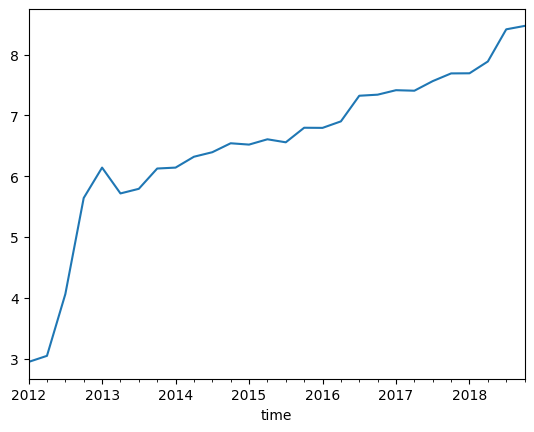

In [31]:
data['log_cost'].plot()

In [66]:
pred_log_vals = smodel.predict_in_sample(data['log_cost'],return_conf_int=True )
pred_log_vals

(2012-01-01    5.929471
 2012-04-01    2.996542
 2012-07-01    3.165295
 2012-10-01    4.669943
 2013-01-01    6.297223
 2013-04-01    6.027907
 2013-07-01    5.506336
 2013-10-01    6.000282
 2014-01-01    6.210024
 2014-04-01    6.086463
 2014-07-01    6.474333
 2014-10-01    6.323116
 2015-01-01    6.677994
 2015-04-01    6.388387
 2015-07-01    6.741516
 2015-10-01    6.406182
 2016-01-01    7.047732
 2016-04-01    6.586646
 2016-07-01    7.095045
 2016-10-01    7.440707
 2017-01-01    7.223915
 2017-04-01    7.502104
 2017-07-01    7.289589
 2017-10-01    7.706284
 2018-01-01    7.622187
 2018-04-01    7.685200
 2018-07-01    7.966659
 2018-10-01    8.654233
 Freq: QS-OCT, dtype: float64,
 array([[ 1.71558844, 10.14335274],
        [ 2.21265638,  3.78042861],
        [ 2.47257899,  3.85801031],
        [ 4.00606565,  5.33382026],
        [ 5.64539298,  6.94905278],
        [ 5.38166483,  6.67414935],
        [ 4.86280982,  6.14986302],
        [ 5.35810537,  6.64245916],
        [

In [67]:
pred_log_df = pd.DataFrame(pred_log_vals[0])
pred_log_df.columns=['lg_pred_val']
pred_all_df = pd.concat([pred_log_df, pred], axis=0, ignore_index=False)

In [68]:
pred_all_df

,lg_pred_val
2012-01-01,5.929471
2012-04-01,2.996542
2012-07-01,3.165295
2012-10-01,4.669943
2013-01-01,6.297223
2013-04-01,6.027907
2013-07-01,5.506336
2013-10-01,6.000282
2014-01-01,6.210024
2014-04-01,6.086463


In [57]:

orig_data = pd.read_csv(r"D:\Smz-Work\Python-DA\Stata\Total-automotive-cost-of-revenues-All.csv", parse_dates=['time'], index_col='time')


In [58]:
orig_data

,Year,Cost
time,,
2012-01-01,2012,19
2012-04-01,2012,21
2012-07-01,2012,58
2012-10-01,2012,282
2013-01-01,2013,465
2013-04-01,2013,304
2013-07-01,2013,328
2013-10-01,2013,458
2014-01-01,2014,465


In [59]:
orig_data['lg_val'] = np.log(orig_data['Cost'])

In [60]:
orig_data

,Year,Cost,lg_val
time,,,
2012-01-01,2012,19,2.944439
2012-04-01,2012,21,3.044522
2012-07-01,2012,58,4.060443
2012-10-01,2012,282,5.641907
2013-01-01,2013,465,6.142037
2013-04-01,2013,304,5.717028
2013-07-01,2013,328,5.793014
2013-10-01,2013,458,6.126869
2014-01-01,2014,465,6.142037


In [69]:
test_df = pd.concat([orig_data, pred_all_df], axis=1, ignore_index=False)

In [70]:
test_df


,Year,Cost,lg_val,lg_pred_val
2012-01-01,2012,19,2.944439,5.929471
2012-04-01,2012,21,3.044522,2.996542
2012-07-01,2012,58,4.060443,3.165295
2012-10-01,2012,282,5.641907,4.669943
2013-01-01,2013,465,6.142037,6.297223
2013-04-01,2013,304,5.717028,6.027907
2013-07-01,2013,328,5.793014,5.506336
2013-10-01,2013,458,6.126869,6.000282
2014-01-01,2014,465,6.142037,6.210024
2014-04-01,2014,556,6.320768,6.086463


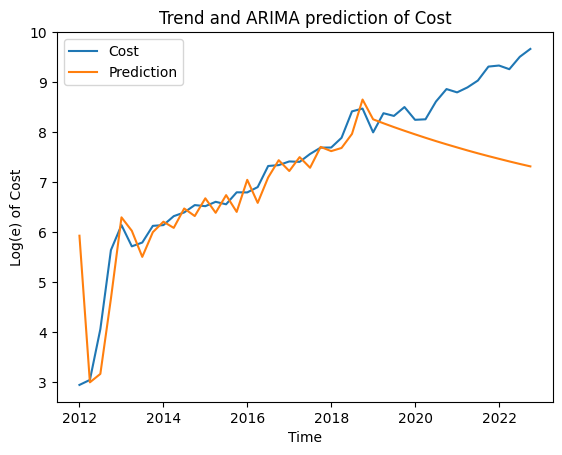

In [83]:
sns.lineplot(x=test_df.index, y="lg_val",err_style="bars", ci=34, data=test_df, label="Cost")
sns.lineplot(x=test_df.index, y="lg_pred_val",err_style="bars", ci=34, data=test_df, label="Prediction")
sns.utils.axlabel("Time", "Log(e) of Cost")
plt.title("Trend and ARIMA prediction of Cost")
plt.legend()